In [1]:
import os
import sys
PROJECT_PATH = "/home/albert/Baikal-ML/" #insert your project path
sys.path.append(f"{PROJECT_PATH}")

import numpy as np
import uproot as ur
import pandas as pd

from data.root_manager.root_reader import RootReader

In [2]:
prty_type = 'muatm'
path_to_roots = f'{PROJECT_PATH}data/mock_MC_2020/{prty_type}/root/all/'

files = os.listdir(f'{path_to_roots}')
paths = sorted([f"{path_to_roots}{file}" for file in files])
prefixes = [f"{prty_type}_{file.split('.')[0]}_" for file in files]

paths, prefixes

(['/home/albert/Baikal-ML/data/mock_MC_2020/muatm/root/all/66470.root',
  '/home/albert/Baikal-ML/data/mock_MC_2020/muatm/root/all/66471.root',
  '/home/albert/Baikal-ML/data/mock_MC_2020/muatm/root/all/66472.root',
  '/home/albert/Baikal-ML/data/mock_MC_2020/muatm/root/all/66473.root',
  '/home/albert/Baikal-ML/data/mock_MC_2020/muatm/root/all/66474.root',
  '/home/albert/Baikal-ML/data/mock_MC_2020/muatm/root/all/66475.root',
  '/home/albert/Baikal-ML/data/mock_MC_2020/muatm/root/all/66476.root',
  '/home/albert/Baikal-ML/data/mock_MC_2020/muatm/root/all/66477.root',
  '/home/albert/Baikal-ML/data/mock_MC_2020/muatm/root/all/66478.root',
  '/home/albert/Baikal-ML/data/mock_MC_2020/muatm/root/all/66479.root'],
 ['muatm_66474_',
  'muatm_66471_',
  'muatm_66473_',
  'muatm_66476_',
  'muatm_66478_',
  'muatm_66475_',
  'muatm_66477_',
  'muatm_66470_',
  'muatm_66479_',
  'muatm_66472_'])

In [3]:
path = paths[0]
particle_type = path.split('/')[-4]
file_name = path.split('/')[-1].split('.')[0]
f"{particle_type}_{file_name}_"

'muatm_66470_'

# Test RootReader

In [21]:
from joblib import Parallel, delayed

def process_file(path, prefix):
    with ur.open(path) as rf:
        rr = RootReader(rf, prefix=prefix)
        df_ev = rr.read_events_as_df()
        df_puls = rr.read_pulses_as_df()
        df_muons = rr.read_ind_mu_as_df()
        df_OM_coords = rr.read_OM_coords()
    return df_ev, df_puls, df_muons, df_OM_coords

results = Parallel(n_jobs=-1)(delayed(process_file)(path, prefix) for (path, prefix) in zip(paths, prefixes))
eventss, pulses, muons, OM_coords = zip(*results)

In [6]:
df_ev = pd.concat(eventss)
df_puls = pd.concat(pulses)
df_muons = pd.concat(muons)


In [25]:
for df in OM_coords[1:]:
    assert df.equals(OM_coords[0]), "Coordinates differ from file to file!"

In [4]:
for _, (path, prefix) in enumerate(zip(paths, prefixes)):
    with ur.open(path) as rf:
        rr = RootReader(rf, prefix=prefix)
        print(rr.start)
        print(rr.PulsesN.array(library="np"))
        if _ == 0:
            df_ev = rr.read_events_as_df()
            df_puls = rr.read_pulses_as_df()
            df_muons = rr.read_ind_mu_as_df()
            df_OM_coords = rr.read_OM_coords()
        else:
            df_ev = pd.concat([df_ev, rr.read_events_as_df()])
            df_puls = pd.concat([df_puls, rr.read_pulses_as_df()])
            df_muons = pd.concat([df_muons, rr.read_ind_mu_as_df()])
            assert df_OM_coords.equals(rr.read_OM_coords())

0
[109  78  86 ...  72  88  67]
0
[89 95 94 ... 83 81 71]
0
[ 87  98  88 ... 100 100  87]
0
[ 65 105  79 ... 106  92  70]
0
[ 72  76  86 ...  92  95 114]
0
[ 81 110 107 ...  86 109  90]
0
[ 91  95 101 ...  88  92  71]
0
[ 97  90  79 ...  94  83 100]
0
[ 90 122 103 ...  99  93  77]
0
[ 73  89 100 ... 100  92 113]


In [3]:
for _, (path, prefix) in enumerate(zip(paths, prefixes)):
    with ur.open(path) as rf:
        rr = RootReader(rf, prefix=prefix)
        print(rr.start)
        print(rr.PulsesN.array(library="np"))
        if _ == 0:
            df_ev = rr.read_events_as_df()
            df_puls = rr.read_pulses_as_df()
            df_muons = rr.read_ind_mu_as_df()
            df_OM_coords = rr.read_OM_coords()
        else:
            df_ev = pd.concat([df_ev, rr.read_events_as_df()])
            df_puls = pd.concat([df_puls, rr.read_pulses_as_df()])
            df_muons = pd.concat([df_muons, rr.read_ind_mu_as_df()])
            assert df_OM_coords.equals(rr.read_OM_coords())
        if _ == 1:
            break

0
[109  78  86 ...  72  88  67]
0
[89 95 94 ... 83 81 71]


In [4]:
df_ev

,PulsesN,PrimeTheta,PrimePhi,PrimeEn,PrimeNuclN,ResponseMuN,BundleEnReg,EventWeight,ev_id
0,109,162.104385,297.663574,363.078400,402.0,12.0,10148.074219,1.0,muatm_66474_0
1,78,120.709091,68.117889,212.226227,402.0,6.0,2933.919922,1.0,muatm_66474_1
2,86,176.489609,334.958191,36.855133,14.0,3.0,2063.121338,1.0,muatm_66474_2
3,91,142.300201,142.110168,18.860073,1608.0,1.0,278.557526,1.0,muatm_66474_3
4,90,136.961853,294.119446,7.563690,14.0,1.0,385.540924,1.0,muatm_66474_4
...,...,...,...,...,...,...,...,...,...
26242,78,154.214569,59.142548,2.004272,14.0,1.0,68.912224,1.0,muatm_66471_26242
26243,89,123.297653,170.082520,208.085632,1608.0,4.0,5452.220215,1.0,muatm_66471_26243
26244,83,163.357574,225.914459,1.578767,14.0,1.0,107.635887,1.0,muatm_66471_26244
26245,81,142.956055,219.525497,246.709030,14.0,2.0,10704.836914,1.0,muatm_66471_26245


In [5]:
df_puls

,PulsesChID,PulsesAmpl,PulsesTime,PulsesFlg,ev_id,is_signal,mu_local_id,cluster_id,string_id
106,2014,2.292498,-1182.611084,0,muatm_66474_0,False,NaN,6,55
38,1854,0.992918,-1180.108398,0,muatm_66474_0,False,NaN,6,51
4,1749,0.814583,-1140.909668,0,muatm_66474_0,False,NaN,6,48
104,2012,0.388047,-1120.847778,0,muatm_66474_0,False,NaN,6,55
15,1790,0.131297,-1111.464478,0,muatm_66474_0,False,NaN,6,49
...,...,...,...,...,...,...,...,...,...
2363226,1378,0.512048,3524.184326,0,muatm_66471_26246,False,NaN,4,38
2363180,1232,1.244164,3747.275391,0,muatm_66471_26246,False,NaN,4,34
2363228,1381,0.158480,3757.379639,0,muatm_66471_26246,False,NaN,4,38
2363211,1329,1.165567,3766.731445,0,muatm_66471_26246,False,NaN,4,36


In [13]:
df_muons.head(15)

,RespMuTheta,RespMuPhi,RespMuTrackX,RespMuTrackY,RespMuTrackZ,RespMuDelay,RespMuEn,ev_id,mu_local_id
0,162.104385,297.663574,-220.355331,33.681580,-42.668026,0.0,253.277191,muatm_66474_0,0
1,162.104385,297.663574,-185.987885,52.382080,-42.863968,0.0,-34.945328,muatm_66474_0,1
2,162.104385,297.663574,-252.868805,26.326200,-45.438789,0.0,21.909910,muatm_66474_0,2
3,162.104385,297.663574,-250.984055,68.951874,-57.346947,0.0,-35.028969,muatm_66474_0,3
4,162.104385,297.663574,-230.734604,31.938164,-43.725452,0.0,93.766808,muatm_66474_0,4
5,162.104385,297.663574,-224.719162,41.103760,-45.444946,0.0,1882.351562,muatm_66474_0,5
6,162.104385,297.663574,-234.230835,43.365818,-47.517860,0.0,-5.172748,muatm_66474_0,6
7,162.104385,297.663574,-225.523727,42.236523,-45.889530,0.0,1.828682,muatm_66474_0,7
8,162.104385,297.663574,-226.884979,34.156387,-43.782730,0.0,919.941711,muatm_66474_0,8
9,162.104385,297.663574,-236.673035,24.425428,-42.467136,0.0,-32.521065,muatm_66474_0,9


In [15]:
df_OM_coords

,PulsesChID,X,Y,Z,cluster_id,string_id,Xc,Yc,Zc,Xrel,Yrel,Zrel
0,0,219.135361,174.354660,-262.688141,0,0,215.385616,116.251927,0.445793,3.749744,58.102733,-263.133934
1,1,219.135361,174.354660,-247.680130,0,0,215.385616,116.251927,0.445793,3.749744,58.102733,-248.125923
2,2,219.135361,174.354660,-232.671127,0,0,215.385616,116.251927,0.445793,3.749744,58.102733,-233.116921
3,3,219.135361,174.354660,-217.663147,0,0,215.385616,116.251927,0.445793,3.749744,58.102733,-218.108940
4,4,219.135361,174.354660,-202.654129,0,0,215.385616,116.251927,0.445793,3.749744,58.102733,-203.099922
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2011,-270.653595,146.058685,203.644836,6,55,-271.862360,146.940425,1.188435,1.208765,-0.881740,202.456401
2012,2012,-270.653595,146.058685,218.650818,6,55,-271.862360,146.940425,1.188435,1.208765,-0.881740,217.462383
2013,2013,-270.653595,146.058685,233.655807,6,55,-271.862360,146.940425,1.188435,1.208765,-0.881740,232.467372
2014,2014,-270.653595,146.058685,248.661865,6,55,-271.862360,146.940425,1.188435,1.208765,-0.881740,247.473430


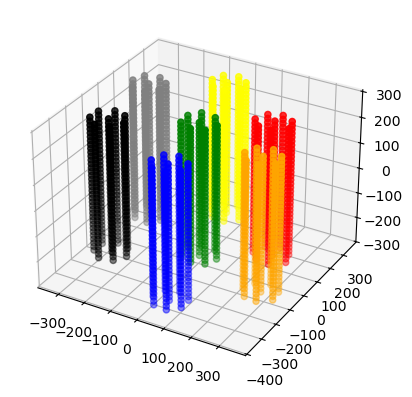

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
def create_3d_scatter(ax, df, c='red'):
    ax.scatter(df['X'], df['Y'], df['Z'], c=c)

colors = ['red','green','yellow','orange','blue','black','grey']
for i in range(7):
    create_3d_scatter(ax, df_OM_coords[i*288:(i+1)*288], c=colors[i])
    #create_3d_scatter(ax, df_OM_coords[288:288*2], c='green')
plt.show()

In [71]:
def get_direction(theta_deg: float, phi_deg: float) -> pd.DataFrame:
    theta = theta_deg/180*np.pi
    phi =  phi_deg/180*np.pi
    df = pd.DataFrame({'dir_x': np.sin(theta)*np.cos(phi), 'dir_y': np.sin(theta)*np.sin(phi), 'dir_z': np.cos(theta)})#, index=list(range(len(phi))))#, columns=['dir_x', 'dir_y', 'dir_z'])
    df['dir_norm'] = np.linalg.norm(df, axis=1, keepdims=True)
    return df

mus = df_muons[['ev_id', 'mu_local_id', 'RespMuTheta', 'RespMuPhi', 'RespMuTrackX', 'RespMuTrackY', 'RespMuTrackZ', 'RespMuDelay']]
mus = pd.concat([mus, get_direction(mus['RespMuTheta'], mus['RespMuPhi'])], axis=1)#].apply(lambda x: get_direction(*x), axis=1)

om_coords = df_OM_coords[['PulsesChID', 'cluster_id', 'X','Y','Z']].set_index('PulsesChID')
pulses = df_puls[['PulsesChID', 'PulsesTime', 'ev_id', 'is_signal', 'cluster_id']].join(om_coords[['X','Y','Z']], 
                                                                                        on='PulsesChID', how='left', lsuffix="")

# mus_dirs = np.array( (np.sin(mus[:,0])*np.cos(mus[:,1]), np.sin(mus[:,0])*np.sin(mus[:,1]), np.cos(mus[:,0])) )
# mus_dirs = np.transpose( mus_dirs, (1,0) )

# targ_vect = om_coords - mus_point
# targ_dist = np.linalg.norm(targ_vect, axis=1, keepdims=True)
# dir_norm = np.linalg.norm(mus_dirs, axis=1, keepdims=True)

pulses[pulses['ev_id']=='muatm_66474_0']

#TODO: посчитать t_res и брать min по мюонам! Shape t_res д.б. = числу хитов --> внутрь таблицы pulses

,PulsesChID,PulsesTime,ev_id,is_signal,cluster_id,X,Y,Z
106,2014,-1182.611084,muatm_66474_0,False,6,-270.653595,146.058685,248.661865
38,1854,-1180.108398,muatm_66474_0,False,6,-252.443604,89.657677,8.503867
4,1749,-1140.909668,muatm_66474_0,False,6,-261.364624,205.025681,54.057850
104,2012,-1120.847778,muatm_66474_0,False,6,-270.653595,146.058685,218.650818
15,1790,-1111.464478,muatm_66474_0,False,6,-222.545593,177.842667,128.767853
...,...,...,...,...,...,...,...,...
69,1906,3559.094971,muatm_66474_0,False,6,-305.115631,97.512672,249.113815
80,1940,3565.193359,muatm_66474_0,False,6,-330.527649,142.657669,219.135849
66,1902,3572.856201,muatm_66474_0,False,6,-305.115631,97.512672,189.033905
36,1845,3621.758301,muatm_66474_0,False,6,-252.443604,89.657677,-126.719139


In [62]:
om_coords

,PulsesChID,cluster_id,X,Y,Z
0,0,0,219.135361,174.354660,-262.688141
1,1,0,219.135361,174.354660,-247.680130
2,2,0,219.135361,174.354660,-232.671127
3,3,0,219.135361,174.354660,-217.663147
4,4,0,219.135361,174.354660,-202.654129
...,...,...,...,...,...
2011,2011,6,-270.653595,146.058685,203.644836
2012,2012,6,-270.653595,146.058685,218.650818
2013,2013,6,-270.653595,146.058685,233.655807
2014,2014,6,-270.653595,146.058685,248.661865


In [27]:
theta_deg, phi_deg = df_muons[['RespMuTheta', 'RespMuPhi']]

In [28]:
theta_deg, phi_deg

('RespMuTheta', 'RespMuPhi')

In [18]:
np.sin(180/180*np.pi)

1.2246467991473532e-16